<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab12/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import asarray
import seaborn as sns
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
import random
import sys
import math

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def winner(weights, sample):	
  # min = sys.maxint
  min = 9223372036854775807
 
  minIndex = 0;
  for j in range(len(weights)):
    Dis = euclidean_distance(sample, weights[j])
    # print("Dis = ", Dis)
    if Dis < min:
      minIndex = j
      min = Dis
  return minIndex

def getNeighour(n, J):
  neigh_dis = []
  i = 0;
  while  i < n:
    neigh_dis.append(euclidean_distance(np.array([i, 0]), np.array([J, 0])))
    i = i+1

  # neigh_dis.append(euclidean_distance(np.array([J, 0]), np.array([J, 0])))

  # i = J+1
  # while i < n:
  #   neigh_dis.append(euclidean_distance(np.array([i, 0]), np.array([J, 0])))
  #   i = i+1
  return neigh_dis

def neighourhoodFunction(d, sigma):
  sqr_d = np.array([number ** 2 for number in d])
  d = sqr_d/(2)
  return np.exp(-d)


def SOM(X_train, number_of_clusters, sigma, epoch, learning_rate):
    # X_train = add_intercept(X_train)
    number_of_features = X_train.shape[1]

    weights = np.empty(shape=(number_of_clusters, number_of_features))
    weights.fill(0.000001)
    # weights = np.array([[1., 1.], [2., 2.], [3., 3.]])
    # print(weights)
    cluster_list = []
    cluster_list_prev = []
    total_samples = X_train.shape[0]
    for i in range(epoch): 
        cluster_list = []
        for j in range(total_samples):# random index from total samples
          sample_x = X_train[j]
          # Compute winner vector (competition)
          J = winner(weights, sample_x) 
          cluster_list.append(J)
          # print("Winner ", J+1)
          d = getNeighour(number_of_clusters, J) #lateral distance, which neurns we have to update
          # print("afetr")
          h = neighourhoodFunction(d, sigma) #amount of cooperation between winner neurons and its neighour
          # print(J, h)
          for c in range(number_of_clusters):
            for j in range(number_of_features):
              #  print(weights[i][j], h[i], sample_x[j])
               weights[c][j] = weights[c][j] + learning_rate*h[c]*(sample_x[j] - weights[c][j]) 
        if((cluster_list_prev == cluster_list)):
            print("No Change in assignment of pattern into  cluster")
            break
        cluster_list_prev = cluster_list.copy() 
        learning_rate = learning_rate*0.5
        # print(np.array(cluster_list))
        label = np.array(cluster_list)
        # print(weights)
        print(f'Silhouette Score(n=3): {silhouette_score(X, label)}')
        # print("len",cluster_list_prev)       
    return weights, cluster_list




In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
X = iris.data
Y = iris.target
# X, Y = shuffle(X, Y)
X = pd.DataFrame(X, columns=iris.feature_names)
print(X)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


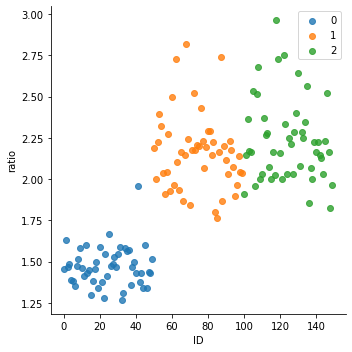

In [ ]:
# https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset

dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset['ID'] = dataset.index
dataset['ratio'] = dataset['sepal length (cm)']/dataset['sepal width (cm)']
sns.lmplot(x="ID", y="ratio", data=dataset, hue="target", fit_reg=False, legend=False)
plt.legend()
plt.show()

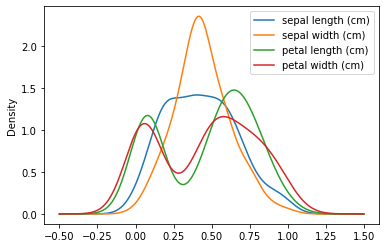

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(X)
X = pd.DataFrame(dataset_new, columns=iris.feature_names)
X.plot.kde()
X = X.values

In [ ]:
X = X.values

In [ ]:
w, g = SOM(X, number_of_clusters=3, sigma=1, epoch=50, learning_rate=1)
print(w)
print(len(g))
label = np.array(g)
label

Silhouette Score(n=3): -0.042991651724483305
Silhouette Score(n=3): 0.011767223702927897
Silhouette Score(n=3): 0.053333049861381786
Silhouette Score(n=3): 0.18432265094643127
Silhouette Score(n=3): 0.3026455703522112
Silhouette Score(n=3): 0.4058660179586494
Silhouette Score(n=3): 0.43009894795028003
Silhouette Score(n=3): 0.42437608402392574
Silhouette Score(n=3): 0.4303510038349577
Silhouette Score(n=3): 0.4159605603120887
No Change in assignment of pattern into  cluster
[[0.31291292 0.46405224 0.31368367 0.29583652]
 [0.45665031 0.41108309 0.52647493 0.51845713]
 [0.56799041 0.3978198  0.67128969 0.67811175]]
150


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
label

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0,
       2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2])

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(X, label)+0.4}')

Silhouette Score(n=3): 0.3569708517027699


## **Inbuilt SOM**

In [ ]:
# !pip install minisom
!pip install sklearn-som

In [ ]:

# from minisom import MiniSom
from sklearn_som.som import SOM as Som
from matplotlib.gridspec import GridSpec
som = Som(m=3, n=1, dim=4)
som.fit(X)
label = som.predict(X)
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(X, label)}')

Silhouette Score(n=3): 0.4801600551262385
